In [1]:
import librosa
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from IPython.display import Audio
import nltk
from nltk.corpus import cmudict
import re

### Load the three audio signals (using Librosa).

The sampling rate should be 44.1kHz or 48kHz.

In [2]:
(y1, rate1) = librosa.load("audio/example_1_mc.wav", sr=None)
(y2, rate2) = librosa.load("audio/example_2_mc.wav", sr=None)
(y3, rate3) = librosa.load("audio/tell_me_about_china.wav", sr=None)

In [3]:
print(f"The sampling rate of the audio signal 1 is {rate1}")
print(f"The sampling rate of the audio signal 2 is {rate2}")
print(f"The sampling rate of the audio signal 3 is {rate3}")

The sampling rate of the audio signal 1 is 44100
The sampling rate of the audio signal 2 is 44100
The sampling rate of the audio signal 3 is 48000


In [4]:
print(f"The length of the audio signal 1 is {1.0 * len(y1) / rate1} seconds")
print(f"The length of the audio signal 2 is {1.0 * len(y2) / rate2} seconds")
print(f"The length of the audio signal 3 is {1.0 * len(y3) / rate3} seconds")

The length of the audio signal 1 is 7.962993197278911 seconds
The length of the audio signal 2 is 7.219954648526077 seconds
The length of the audio signal 3 is 1.3013125 seconds


### Break down the phrases of focus into phonemes (using CMUdict).

The phrases of focus here are "tell me about china", "tell me/us all about china/nixon", and "give me the news headlines".

In [5]:
# First, download the CMUdict using NLTK
nltk.download('cmudict')

cmu = cmudict.dict()

[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/mattcohen/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [6]:
def strip_stress(phoneme):
    return re.sub(r"\d", "", phoneme)

def word_to_phones(word, cmu_dict):
    word = word.lower()
    if word not in cmu_dict:
        raise ValueError(f"Word not in CMUdict: {word}")

    # Use first pronunciation
    phones = cmu_dict[word][0]
    return [strip_stress(p) for p in phones]

def phrase_to_phones(phrase, cmu_dict):
    phrase_phones= []
    for word in phrase:
        phones = word_to_phones(word, cmu_dict=cmu)
        phrase_phones.append(phones)
        print(f"{word}: {phones}")

In [7]:
phrase_1 = ["tell", "me", "us", "all", "about", "china", "nixon"]

phrase_2 = ["give", "me", "the", "news", "headlines"]

phrase_3 = ["tell", "me", "about", "china"]

In [8]:
phrase_phones_1 = phrase_to_phones(phrase=phrase_1, cmu_dict=cmu)

tell: ['T', 'EH', 'L']
me: ['M', 'IY']
us: ['AH', 'S']
all: ['AO', 'L']
about: ['AH', 'B', 'AW', 'T']
china: ['CH', 'AY', 'N', 'AH']
nixon: ['N', 'IH', 'K', 'S', 'AH', 'N']


In [9]:
phrase_phones_2 = phrase_to_phones(phrase=phrase_2, cmu_dict=cmu)

give: ['G', 'IH', 'V']
me: ['M', 'IY']
the: ['DH', 'AH']
news: ['N', 'UW', 'Z']
headlines: ['HH', 'EH', 'D', 'L', 'AY', 'N', 'Z']


In [14]:
phrase_phones_3 = phrase_to_phones(phrase=phrase_3, cmu_dict=cmu)

tell: ['T', 'EH', 'L']
me: ['M', 'IY']
about: ['AH', 'B', 'AW', 'T']
china: ['CH', 'AY', 'N', 'AH']


### Load the third audio signal (Stephen's "Tell me about China") and plot this signal (full and zoomed in)

In [16]:
# Play the loaded audio
display(Audio(data=y3, rate=rate3))

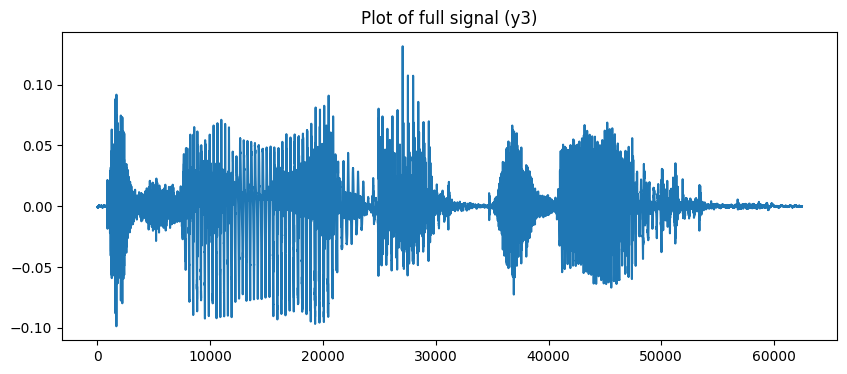

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(y3)
plt.title('Plot of full signal (y3)')
plt.show()

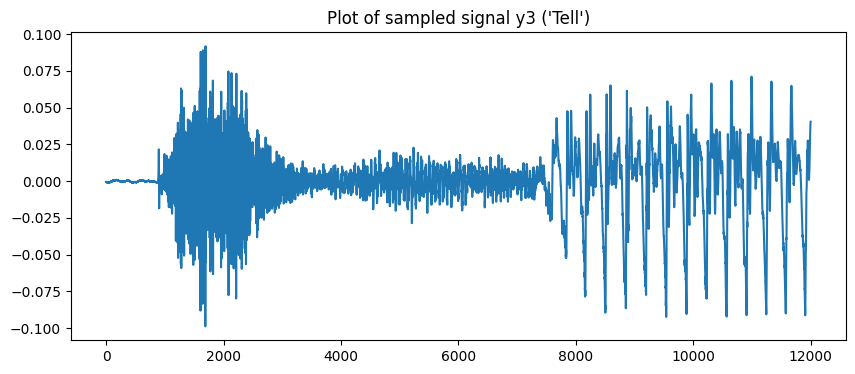

In [60]:
plt.figure(figsize=(10, 4))
plt.plot(y3[0:12000])
plt.title("Plot of sampled signal y3 ('Tell')")
plt.show()

In [ ]:
display(Audio(data=y3[0:12000], rate=rate3))

### Create a dictionary with mappings (range of signal samples for phones in a given phrase from a given speaker)

In [248]:
phone_to_audio_mappings = {
    "sent1": {
        "text": "tell me us all about china nixon",
        "speaker": "mc",
        "words": {
            "tell": [
                {
                    "phone": "T",
                    "start": 55000,
                    "end": 61500
                },
                {
                    # "phone": "EH",
                    "phone": "AH",
                    "start": 61500,
                    "end": 66500
                },
                {
                    # "phone": "L",
                    "phone": "EL",
                    "start": 66500,
                    "end": 82000
                },
            ],
            "me": [
                {
                    "phone": "M",
                    "start": 97500,
                    "end": 105000
                },
                {
                    "phone": "IY",
                    "start": 105000,
                    "end": 120000
                }
            ],
            "us": [
                {
                    # "phone": "AH",
                    "phone": "IH",
                    "start": 140000,
                    "end": 150000
                },
                {
                    "phone": "S",
                    "start": 150000,
                    "end": 163000
                }
            ],
            "all": [
                {
                    # "phone": "AO",
                    "phone": "OW",
                    "start": 176000,
                    "end": 186000
                },
                {
                    # "phone": "L",
                    "phone": "EL",
                    "start": 186000,
                    "end": 205000
                }
            ],
            "about": [
                {
                    # "phone": "AH",
                    "phone": "A",
                    "start": 210000,
                    "end": 215000
                },
                {
                    "phone": "B",
                    "start": 215000,
                    "end": 218500
                },
                {
                    "phone": "AW",
                    "start": 218500,
                    "end": 230000
                },
                {
                    "phone": "T",
                    "start": 230000,
                    "end": 240000
                }
            ],
            "china": [
                {
                    # "phone": "CH",
                    "phone": "SH",
                    "start": 250000,
                    "end": 260000
                },
                {
                    "phone": "AY",
                    "start": 260000,
                    "end": 265000
                },
                {
                    "phone": "N",
                    "start": 265000,
                    "end": 270000
                },
                {
                    # "phone": "AH",
                    "phone": "UH",
                    "start": 270000,
                    "end": 285000
                }
            ],
            "nixon": [
                {
                    "phone": "N",
                    "start": 294000,
                    "end": 299000
                },
                {
                    # "phone": "I",
                    "phone": "IH",
                    "start": 299000,
                    "end": 303000
                },
                {
                    "phone": "X",
                    "start": 303000,
                    "end": 309500
                },
                # {
                #     "phone": "K",
                #     "start": 303000,
                #     "end": 304500
                # },
                # {
                #     "phone": "S",
                #     "start": 304500,
                #     "end": 309500
                # },
                {
                    "phone": "EN",
                    "start": 309500,
                    "end": 320000
                },
                # {
                #     "phone": "AH",
                #     "start": 309500,
                #     "end": 312000
                # },
                # {
                #     "phone": "N",
                #     "start": 312000,
                #     "end": 320000
                # }
            ]
        }
    },
    "sent2": {
        "text": "give me the news headline",
        "speaker": "mc",
        "words": {
            "give": [
                {
                    "phone": "G",
                    "start": 66500,
                    "end": 69000
                },
                {
                    "phone": "IH",
                    "start": 69000,
                    "end": 78000
                },
                {
                    "phone": "V",
                    "start": 78000,
                    "end": 84000
                },
            ],
            "me": [
                {
                    "phone": "M",
                    "start": 108000,
                    "end": 113000
                },
                {
                    "phone": "IY",
                    "start": 113000,
                    "end": 136000
                }
            ],
            "the": [
                {
                    # "phone": "DH",
                    "phone": "TH",
                    "start": 152000,
                    "end": 158000
                },
                {
                    # "phone": "AH",
                    "phone": "UH",
                    "start": 158000,
                    "end": 180000
                }
            ],
            "news": [
                {
                    "phone": "N",
                    "start": 195000,
                    "end": 205000
                },
                {
                    # "phone": "UW",
                    "phone": "OO",
                    "start": 205000,
                    "end": 215000
                },
                {
                    # "phone": "Z",
                    "phone": "S",
                    "start": 215000,
                    "end": 225000
                }
            ],
            "headlines": [
                {
                    # "phone": "HH",
                    "phone": "H",
                    "start": 243000,
                    "end": 246500
                },
                {
                    # "phone": "EH",
                    "phone": "AA",
                    "start": 246500,
                    "end": 249000
                },
                {
                    "phone": "D",
                    "start": 249000,
                    "end": 255000
                },
                {
                    "phone": "L",
                    "start": 255000,
                    "end": 257000
                },
                {
                    "phone": "AY",
                    "start": 257000,
                    "end": 265000
                },
                {
                    "phone": "N",
                    "start": 265000,
                    "end": 271000
                },
                {
                    # "phone": "Z",
                    "phone": "S",
                    "start": 271000,
                    "end": 275500
                }
            ],
        }
    },
    "sent3": {
        "text": "tell me about china",
        "speaker": "stephen",
        "words": {
            "tell": [
                {
                    "phone": "T",
                    "start": 0,
                    "end": 4500
                },
                {
                    # "phone": "EH",
                    "phone": "AH",
                    "start": 4500,
                    "end": 7000
                },
                {
                    # "phone": "L",
                    "phone": "EL",
                    "start": 7000,
                    "end": 12000
                },
            ],
            "me": [
                {
                    "phone": "M",
                    "start": 12000,
                    "end": 15500
                },
                {
                    "phone": "IY",
                    "start": 15500,
                    "end": 19000
                }
            ],
            "about": [
                {
                    # "phone": "AH",
                    "phone": "A",
                    "start": 19000,
                    "end": 21500
                },
                {
                    "phone": "B",
                    "start": 21500,
                    "end": 25000
                },
                {
                    "phone": "AW",
                    "start": 25000,
                    "end": 31500
                },
                {
                    "phone": "T",
                    "start": 31500,
                    "end": 35000
                },
            ],
            "china": [
                {
                    # "phone": "CH",
                    "phone": "SH",
                    "start": 35000,
                    "end": 40500
                },
                {
                    "phone": "AY",
                    "start": 40500,
                    "end": 46000
                },
                {
                    "phone": "N",
                    "start": 46000,
                    "end": 51500
                },
                {
                    # "phone": "AH",
                    "phone": "UH",
                    "start": 51500,
                    "end": 56000
                },
            ]
        }
    }
}

### Compute the LPC coefficients for a given sampled signal. Also compute the spectral envelope for the signal.

In [244]:
def lpc_to_envelope(signal, order, sr):
    # Compute the LPC coefficients
    #    The result 'a' contains the filter coefficients [a_1, a_2, ..., a_p] 
    #    The first coefficient a[0] is implicitly 1 in the standard LPC form.
    # The LPC coefficients 'a' define an all-pole filter. The frequency response of this
    # filter gives the spectral envelope.
    a = librosa.lpc(signal, order=order)

    # The 'a' coefficients from librosa are the predictor coefficients (a[1:]), with a[0] being 1
    # For freqz, we use the full 'a' array as the denominator (b=[1], a=a)
    # If the function returns a[1:] only, you'd use a = np.hstack([[1], -a_coeffs])

    # Compute the frequency response of the LPC filter
    # The 'a' coefficients are the denominator of the transfer function [1, a[1], a[2], ...]
    # The numerator is implicitly a constant (gain, related to error variance)
    w, h = scipy.signal.freqz(b=[1], a=a, worN=8192, fs=sr)

    # The result 'h' is complex, take magnitude and convert to dB
    lpc_envelope = np.abs(h)

    return a, w, h, lpc_envelope


In [245]:
def compute_spectral_envelopes(mappings, order, rates):
    results = {}

    for key in mappings.keys():
        if key == "sent1":
            signal = y1
            rate = rates["y1"]
        elif key == "sent2":
            signal = y2
            rate = rates["y2"]
        else:
            signal = y3
            rate = rates["y3"]
        
        mapping = mappings.get(key)

        speaker = mapping.get("speaker")
        words = mapping.get("words")

        for word_key in words.keys():
            curr_word_mappings = words.get(word_key)
            for phone_mapping in curr_word_mappings:
                phone = phone_mapping.get("phone")
                start = phone_mapping.get("start")
                end = phone_mapping.get("end")

                sampled_signal = signal[start:end]

                a, w, h, lpc_envelope = lpc_to_envelope(
                    signal=sampled_signal,
                    order=order,
                    sr=rate
                )

                if speaker == "mc":
                    output_name = speaker + "_" + key + "_" + word_key + "_" + phone
                else:
                    output_name = speaker + "_" + word_key + "_" + phone

                results[output_name] = {
                    "lpc": a,
                    "w": w,
                    "h": h,
                    "lpc_envelope": lpc_envelope,
                    "phone": phone,
                    "rate": rate
                }

    return results

In [246]:
def plot_spectral_envelope(w, lpc_envelope, sr, phone, order):
    # Plot the LPC envelope
    plt.figure(figsize=(10, 6))
    # Plot LPC envelope (in dB scale)
    plt.plot(w, 20 * np.log10(lpc_envelope / np.max(lpc_envelope)), 'r-', linewidth=2, label=f'LPC Envelope (Order {order}) (dB)')

    plt.title(f"LPC Spectral Envelope ({phone})")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, sr / 2) # Limit to Nyquist frequency
    plt.show()

In [249]:
order = 12

rates = {
    "y1": rate1,
    "y2": rate2,
    "y3": rate3
}

spectral_envelope_outputs = compute_spectral_envelopes(
    mappings=phone_to_audio_mappings,
    order=order,
    rates=rates
)

### Plot the spectral envelope for a specific phone (T from the word "tell", for both speakers)

In [253]:
result1 = spectral_envelope_outputs.get("mc_sent1_tell_T")

result2 = spectral_envelope_outputs.get("stephen_tell_T")

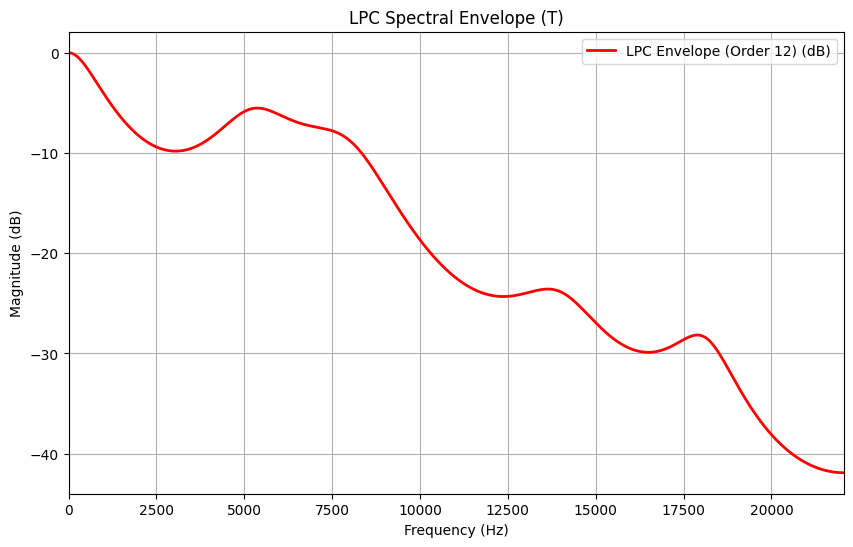

In [251]:
plot_spectral_envelope(
    w=result1.get("w"),
    lpc_envelope=result1.get("lpc_envelope"),
    sr=result1.get("rate"),
    phone=result1.get("phone"),
    order=order
)

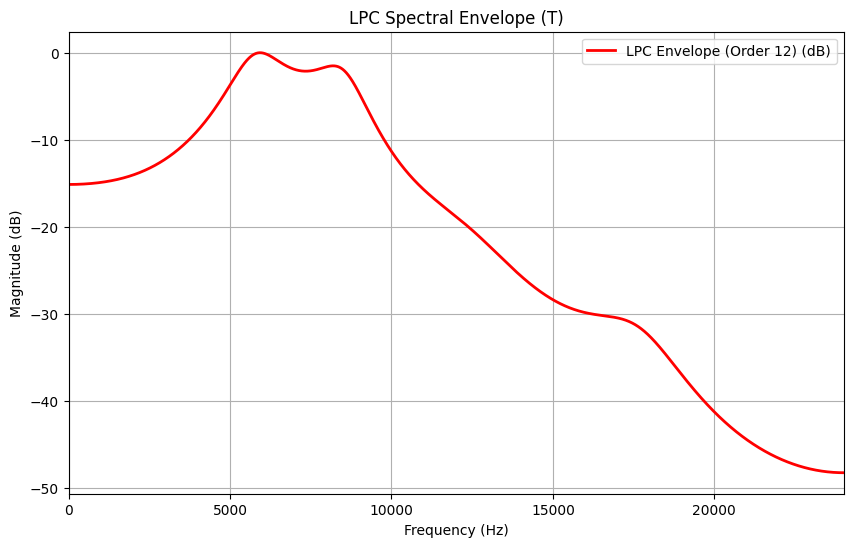

In [254]:
plot_spectral_envelope(
    w=result2.get("w"),
    lpc_envelope=result2.get("lpc_envelope"),
    sr=result2.get("rate"),
    phone=result2.get("phone"),
    order=order
)

### Save the LPC coefficient / spectral envelope outputs to a .npy file

In [255]:
np.save('spectral_envelopes_final.npy', spectral_envelope_outputs)

### Verify that saving the file worked correctly.

In [256]:
spectral_envelope_outputs_loaded = np.load('spectral_envelopes_final.npy', allow_pickle=True)

In [257]:
spectral_envelopes_loaded_dict = spectral_envelope_outputs_loaded.item()

In [258]:
curr_result = spectral_envelopes_loaded_dict.get("stephen_tell_T")

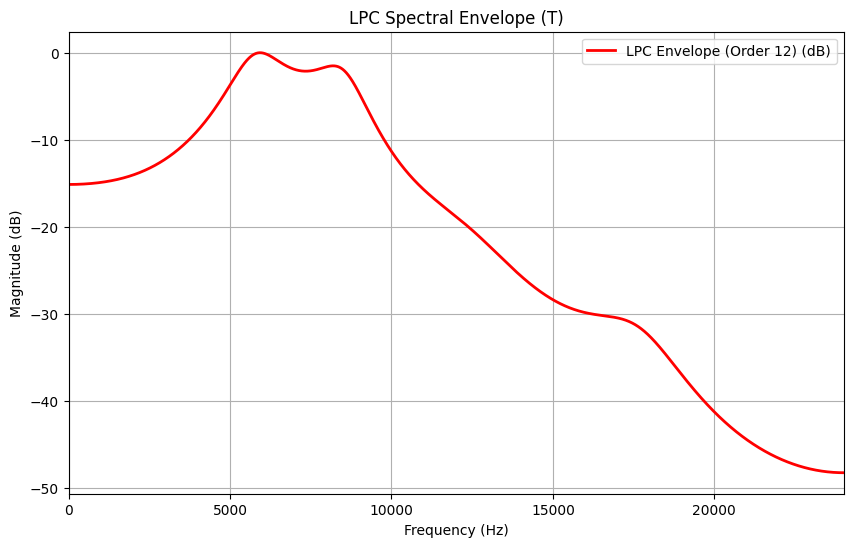

In [259]:
plot_spectral_envelope(
    w=curr_result.get("w"),
    lpc_envelope=curr_result.get("lpc_envelope"),
    sr=curr_result.get("rate"),
    phone=curr_result.get("phone"),
    order=order
)